In [1]:
import xgboost as xgb
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, RepeatedKFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 


In [2]:
crypto_details_df = pd.read_csv('csv/crypto_details_target.csv')
crypto_details_df.head(20)

,Unnamed: 0,timestamp,date,Asset_ID,Asset_Name,Weight,Count,Volume,Open,High,Low,Close,VWAP,Target
0,0,1592697660,2020-06-21 00:01:00,1,Bitcoin,6.779922,504.0,15.768265,9364.227143,9378.100000,9359.9800,9366.225714,9365.439427,-0.000791
1,1,1592697660,2020-06-21 00:01:00,11,Monero,1.609438,6.0,23.654590,64.090000,64.110000,64.0900,64.110000,64.093652,-0.002652
2,2,1592697660,2020-06-21 00:01:00,5,EOS.IO,1.386294,435.0,80796.575643,2.540683,2.547300,2.5387,2.542350,2.542050,-0.002344
3,3,1592697660,2020-06-21 00:01:00,0,Binance Coin,4.304065,22.0,290.890000,16.068600,16.077500,16.0682,16.069700,16.070634,0.005875
4,4,1592697660,2020-06-21 00:01:00,9,Litecoin,2.397895,125.0,738.758489,43.651500,43.670000,43.6400,43.657500,43.656948,-0.000662
5,5,1592697660,2020-06-21 00:01:00,6,Ethereum,5.894403,424.0,1300.092998,229.055000,229.459933,228.9100,229.154989,229.136591,-0.000949
6,6,1592697720,2020-06-21 00:02:00,11,Monero,1.609438,12.0,63.852110,64.120000,64.120000,64.1000,64.110000,64.107327,-0.003044
7,7,1592697720,2020-06-21 00:02:00,9,Litecoin,2.397895,36.0,118.165684,43.661000,43.680000,43.6400,43.667200,43.664316,-0.000395
8,8,1592697720,2020-06-21 00:02:00,6,Ethereum,5.894403,289.0,239.642529,229.134596,229.437578,229.0100,229.161263,229.138053,-0.000677
9,9,1592697720,2020-06-21 00:02:00,0,Binance Coin,4.304065,46.0,481.530000,16.067300,16.072600,16.0648,16.066900,16.068496,0.003569


In [3]:
crypto_details_df.drop(['Unnamed: 0','timestamp','date','Asset_Name','Weight'], axis=1, inplace=True)

crypto_details_df.head(20)

,Asset_ID,Count,Volume,Open,High,Low,Close,VWAP,Target
0,1,504.0,15.768265,9364.227143,9378.100000,9359.9800,9366.225714,9365.439427,-0.000791
1,11,6.0,23.654590,64.090000,64.110000,64.0900,64.110000,64.093652,-0.002652
2,5,435.0,80796.575643,2.540683,2.547300,2.5387,2.542350,2.542050,-0.002344
3,0,22.0,290.890000,16.068600,16.077500,16.0682,16.069700,16.070634,0.005875
4,9,125.0,738.758489,43.651500,43.670000,43.6400,43.657500,43.656948,-0.000662
5,6,424.0,1300.092998,229.055000,229.459933,228.9100,229.154989,229.136591,-0.000949
6,11,12.0,63.852110,64.120000,64.120000,64.1000,64.110000,64.107327,-0.003044
7,9,36.0,118.165684,43.661000,43.680000,43.6400,43.667200,43.664316,-0.000395
8,6,289.0,239.642529,229.134596,229.437578,229.0100,229.161263,229.138053,-0.000677
9,0,46.0,481.530000,16.067300,16.072600,16.0648,16.066900,16.068496,0.003569


In [4]:
y = crypto_details_df['Target'].values
X = crypto_details_df.drop(columns=['Target']).values

In [5]:
#Split the data into training and testing set
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.33, random_state=42)

In [6]:
# define model
model = xgb.XGBRegressor(verbosity=0)
print(model)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None,
             gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=None,
             reg_alpha=None, reg_lambda=None, ...)


In [7]:
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
cv

RepeatedKFold(n_repeats=3, n_splits=10, random_state=1)

In [8]:
model.fit(Xtrain, ytrain)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [9]:
score = model.score(Xtrain, ytrain)  
print("Training score: ", score)

Training score:  0.04071234589979855


In [10]:
scores = cross_val_score(model, Xtrain, ytrain,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: 0.01


In [12]:
ypred = model.predict(Xtest)
mse = mean_squared_error(ytest, ypred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**(1/2.0)))

MSE: 0.00
RMSE: 0.00


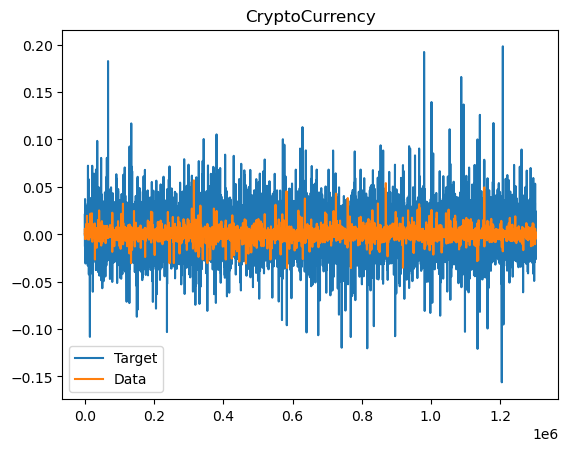

In [14]:
x_ax = range(len(ytest))
plt.plot(x_ax, ytest, label="Target")
plt.plot(x_ax, ypred, label="Data")
plt.title("CryptoCurrency")
plt.legend()
plt.show()